Q1. Relationship Between Polynomial Functions and Kernel Functions in Machine Learning

Polynomial functions can be used as kernel functions in machine learning algorithms like SVMs. Here's the connection:

Standard SVMs: These operate in the original input space, which limits them to handling linearly separable data.
Kernel trick: Kernel functions project the data into a higher-dimensional feature space where it might be linearly separable. Polynomial functions are one way to achieve this projection.
By applying a polynomial kernel function, you essentially create new features that are polynomial combinations of the original features. This allows the SVM to learn more complex decision boundaries in the high-dimensional space, which can be mapped back to the original input space for prediction.

Q2. Implementing SVM with Polynomial Kernel in Python (Scikit-learn)

Here's how to implement an SVM with a polynomial kernel in Python using Scikit-learn:

Python
import numpy as np
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Sample data
X = np.array([[1, 1], [2, 2], [3, 1], [4, 0]])
y = np.array([2, 3, 4, 5])

# Standardize data (recommended for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create SVR model with polynomial kernel
model = SVR(kernel='poly', degree=3, C=1.0)  # Adjust degree and C as needed

# Train the model
model.fit(X_scaled, y)

# Make predictions on new data
new_data = np.array([[5, -1]])  # Example new data point
new_data_scaled = scaler.transform(new_data)
predicted_y = model.predict(new_data_scaled)

print("Predicted value for new data:", predicted_y)
Use code with caution.
In this example:

kernel='poly' specifies the polynomial kernel.
degree=3 sets the degree of the polynomial.
C=1.0 is the regularization parameter (explained in Q4).
Q3. Increasing Epsilon's Effect on Support Vectors in SVR

The epsilon (ε) parameter in SVR defines a tolerance for errors around the regression line. Here's how it affects support vectors:

Higher epsilon: Allows for more flexibility in the model, potentially reducing the number of support vectors. This is because more training points can deviate from the prediction line by up to ε without being penalized.
Lower epsilon: Enforces stricter fitting, potentially increasing the number of support vectors. The model becomes more sensitive to errors, and more training points might be needed to define the margin around the regression line.


How Kernel Function, C, Epsilon, and Gamma Affect SVR Performance
These parameters play a crucial role in shaping the behavior and performance of your SVR model. Let's delve into how each one influences the model:

1. Kernel Function:

This function transforms your data into a higher-dimensional space where it might be linearly separable. Different kernels create different decision boundaries:

Linear kernel: Suitable for linearly related data. No additional parameters needed.
Polynomial kernel: Creates complex, non-linear boundaries. Increase the degree for more complex relationships (but risk overfitting).
Radial Basis Function (RBF) kernel: Flexible kernel that works well for various data types. Gamma (explained later) controls the influence of data points.
Sigmoid kernel: Similar to RBF, but with limitations. Consider alternatives like RBF for better performance.
Choosing a kernel function: There's no silver bullet. Experiment with different options based on your data and the type of relationship you're modeling. Look for kernels that can capture the underlying complexity without overfitting.

2. C (Regularization Parameter):

C controls the trade-off between fitting the training data and model complexity:

Higher C: Enforces stricter fitting, potentially leading to overfitting (memorizing noise in the training data). Good for small, noisy datasets where capturing every detail is crucial. However, it might not generalize well to unseen data.
Lower C: Allows for more flexibility, reducing overfitting but risking underfitting (failing to capture the true relationship). Use lower C for larger datasets or when you want a more generalizable model.
Choosing C: Start with a moderate C and adjust based on your validation performance. A good model should balance fitting the training data with generalizability.

3. Epsilon (ε):

Epsilon defines the tolerance for errors around the regression line in SVR. It essentially creates an "insensitive zone" where errors are allowed:

Higher epsilon: Allows for more flexibility, potentially leading to a smoother fit but potentially missing important details in the data. Use higher epsilon when dealing with noisy data or when capturing broad trends is more important than exact predictions.
Lower epsilon: Enforces stricter fitting, potentially capturing more details but making the model more sensitive to noise. Use lower epsilon for cleaner data or when accurate predictions are critical.
Choosing epsilon: Consider the trade-off between capturing the underlying trend and sensitivity to noise. A good starting point might be to set epsilon to a small value proportional to the range of your target variable.

4. Gamma (RBF Kernel Specific):

Gamma is specific to the RBF kernel and controls the influence of individual training points (support vectors) on the decision boundary:

Higher gamma: Increases the influence of nearby training points, leading to more complex and potentially overfitted models. Use higher gamma if your data has intricate local patterns.
Lower gamma: Reduces the influence of nearby points, creating smoother decision boundaries but potentially underfitting the data. Use lower gamma for simpler relationships or when dealing with high-dimensional data.
Choosing gamma: Similar to C, start with a moderate value and adjust based on your validation performance. Aim for a balance between capturing local variations and avoiding overfitting.

Remember: Finding the optimal values for these parameters often involves an iterative process of experimentation and evaluation using techniques like cross-validation. There's no single "best" set of values – it depends on your specific data and modeling goals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('/content/sample_data/Social_Network_Ads.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.svm import SVC
classifier = SVC(random_state=0) # for non-linear model use this parametre kernel='rbf'
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [8]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

[[64  4]
 [ 3 29]]
0.93


In [16]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear', 'poly', 'rbf', 'sigmoid']
              }

In [17]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [18]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.800 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.717 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.883 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.783 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.750 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.900 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.833 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.883 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rb

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [19]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [23]:
y_pred4=grid.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100

[[64  4]
 [ 3 29]]
0.93


In [25]:
from mlxtend.plotting import plot_decision_regions

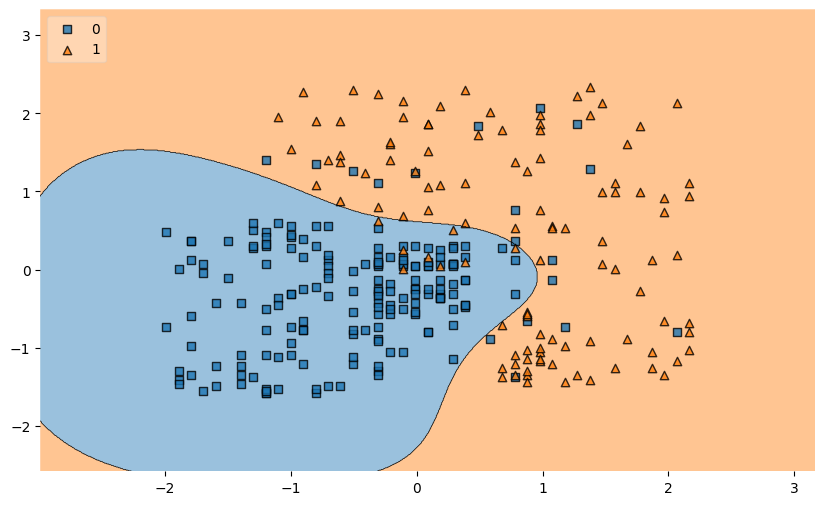

In [31]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train, y_train, clf=grid, legend=2)
plt.show()